### This project attempts to discover what factors influence an individual’s decision to subscribe to a course on Udemy using the Udemy online education courses dataset(2012-2017)

##### the code below creates a new dataset out of the original udemy dataset inorder to transform it into a proper relational data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# load the original dataset
#udemy_data = pd.read_csv("udemy_online_education_courses_dataset.csv")

# Step 1: Create the Subjects Table
#subjects = pd.DataFrame({'subject': udemy_data['subject'].unique()})
#subjects['subject_id'] = range(1, len(subjects) + 1)

# Save the Subjects table to a CSV file
#subjects_file = 'C:/Users/Mmasiter/Desktop/CSS documents/winter semester 2024/Databases/project/subjects.csv'
#subjects.to_csv(subjects_file, index=False)

# Step 2: Add subject_id to the Courses DataFrame
#udemy_data = udemy_data.merge(subjects, how='left', on='subject')

# Step 3: Create the Courses Table (with subject_id instead of subject)
#courses = udemy_data.drop(columns=['subject'])  # Drop the original subject column

# Save the Courses table to a CSV file
#courses_file = 'C:/Users/Mmasiter/Desktop/CSS documents/winter semester 2024/Databases/project/courses.csv'
#courses.to_csv(courses_file, index=False)

# Print confirmation
#print(f"Subjects table saved to: {subjects_file}")
#print(f"Courses table saved to: {courses_file}")






In [2]:
courses = pd.read_csv("courses.csv")
subjects = pd.read_csv("subjects.csv")

udemy_data = courses.merge(subjects, how='left', on='subject_id')

print(udemy_data.head())


   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792        

In [3]:
udemy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5
subject_id,3678.0,2.512507,1.246035,1.0,1.0,3.0,4.00,4.0


In [4]:
udemy_data.sample(5) # shows 5 rows randomly

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject_id,subject
3566,1124280,PHP Tutorial: Learn PHP Basic Programming for ...,https://www.udemy.com/php-tutorial-beginners/,True,20,2510,21,23,Beginner Level,1.500000,2017-03-08T19:04:55Z,4,Web Development
2157,1190448,Learn Lion (Saroo) Soundtrack On The Piano By Ear,https://www.udemy.com/learn-lion-saroo-soundtr...,True,20,104,0,9,All Levels,0.533333,2017-04-24T19:51:27Z,3,Musical Instruments
174,1103718,Naked Put Options Trade Covered Call & Poor Ma...,https://www.udemy.com/naked-put-options-trade-...,True,200,939,7,19,All Levels,1.500000,2017-02-10T22:40:57Z,1,Business Finance
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,4,Web Development
3124,982860,Django + AngularJS for a Powerful Web Application,https://www.udemy.com/django-angularjs/,True,95,4463,59,36,Intermediate Level,5.500000,2016-10-13T17:34:00Z,4,Web Development


In [5]:
udemy_data.isnull().sum() # checks for missing value

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject_id             0
subject                0
dtype: int64

In [6]:
duplicates = udemy_data.duplicated().sum()
print(duplicates)

6


In [26]:
duplicates = udemy_data[udemy_data.duplicated(subset = "course_id", keep= False)]
duplicates

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject_id,subject,published_date


In [27]:
udemy_data= udemy_data.drop_duplicates(subset= "course_id")
print(duplicates)

Empty DataFrame
Columns: [course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject_id, subject, published_date]
Index: []


In [28]:
# convert the is_paid column to numeric
udemy_data['is_paid'] = udemy_data['is_paid'].astype(int)


In [10]:
print(udemy_data.head())

   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...        1    200   
1      https://www.udemy.com/goods-and-services-tax/        1     75   
2  https://www.udemy.com/financial-modeling-for-b...        1     45   
3  https://www.udemy.com/complete-excel-finance-c...        1     95   
4  https://www.udemy.com/how-to-maximize-your-pro...        1    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792        

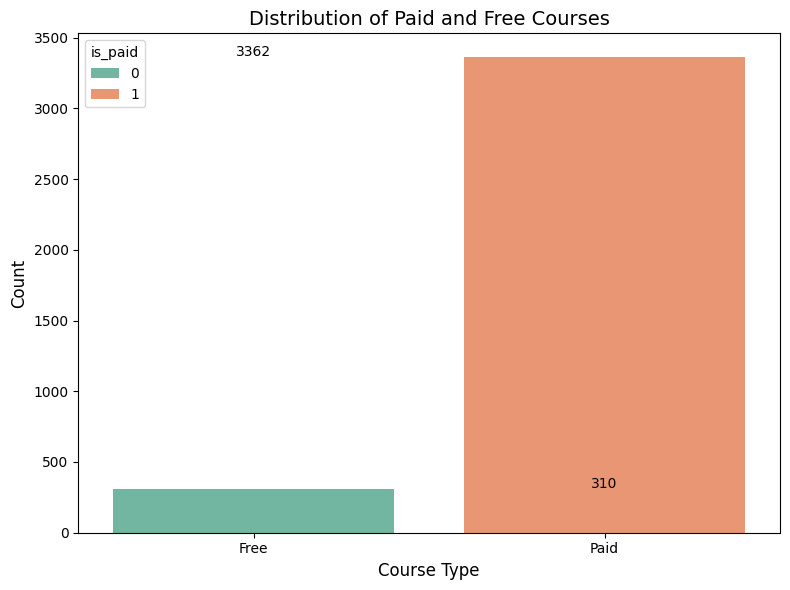

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=udemy_data, x='is_paid', palette='Set2', hue= 'is_paid', dodge=False)
plt.title('Distribution of Paid and Free Courses', fontsize=14)
plt.xlabel('Course Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Free', 'Paid'], fontsize=10)

for i, count in enumerate(udemy_data['is_paid'].value_counts()):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)
plt.tight_layout()


([0, 1, 2, 3],
 [Text(0, 0, 'Business Finance'),
  Text(1, 0, 'Graphic Design'),
  Text(2, 0, 'Musical Instruments'),
  Text(3, 0, 'Web Development')])

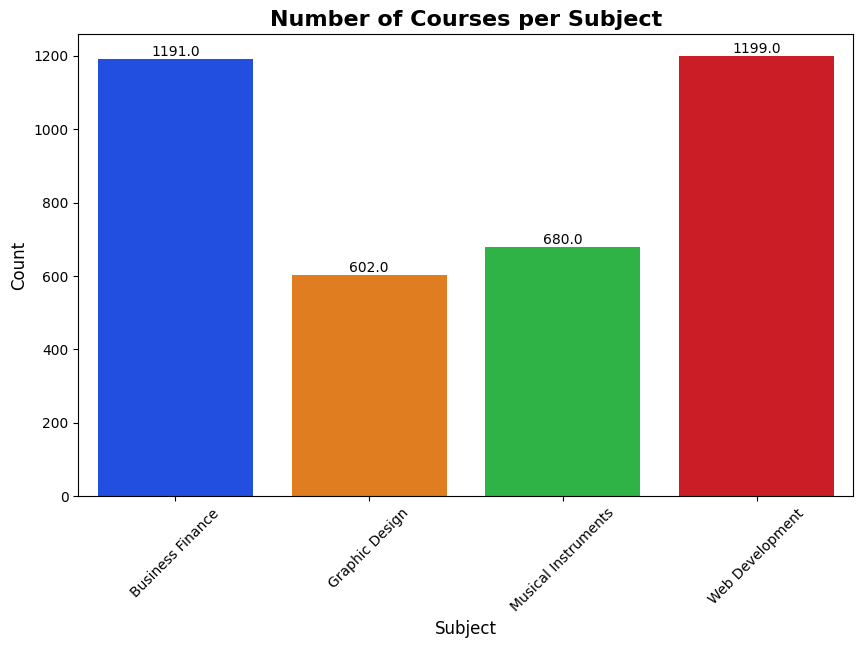

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=udemy_data, x='subject', hue='subject', palette='bright', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Number of Courses per Subject', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)


([0, 1, 2, 3],
 [Text(0, 0, 'Business Finance'),
  Text(1, 0, 'Graphic Design'),
  Text(2, 0, 'Musical Instruments'),
  Text(3, 0, 'Web Development')])

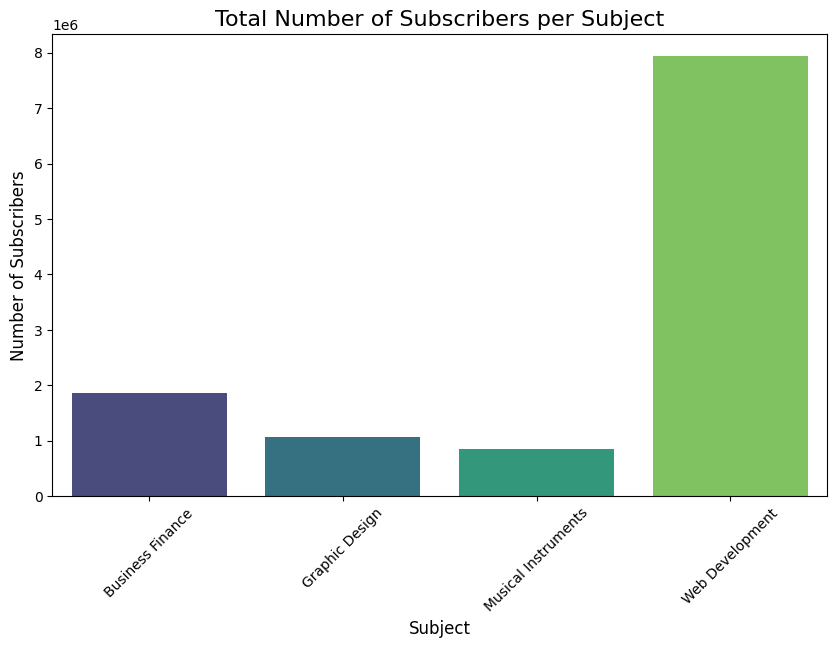

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=udemy_data, 
    x='subject', 
    y='num_subscribers', 
    estimator='sum', 
    errorbar=None, 
    palette='viridis',
    hue= 'subject'
)

plt.title('Total Number of Subscribers per Subject', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Number of Subscribers', fontsize=12)
plt.xticks(rotation=45)

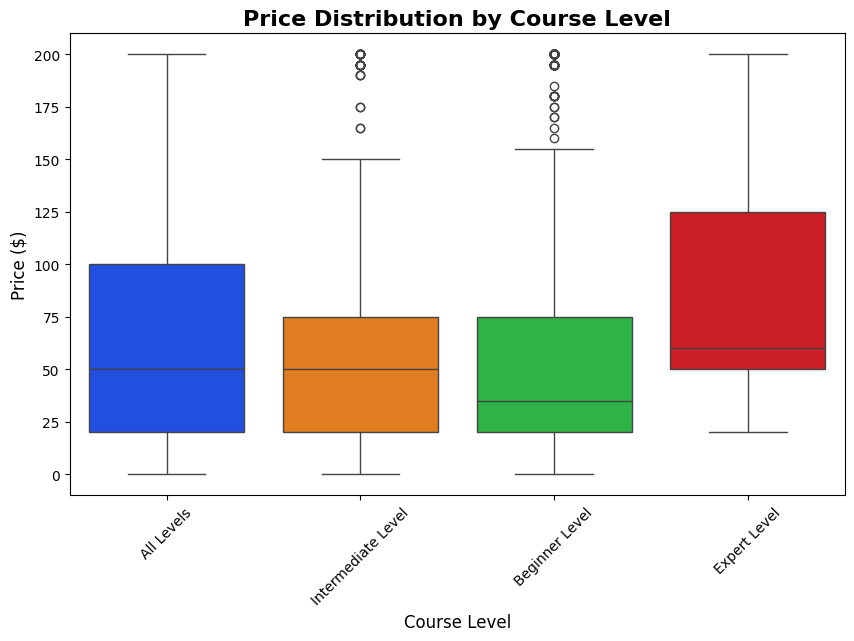

In [14]:
plt.figure(figsize=(10, 6))

ax = sns.boxplot(
    data=udemy_data, 
    x='level', 
    y='price', 
    palette='bright', 
    hue= "level",
)

plt.title('Price Distribution by Course Level', fontsize=16, fontweight='bold')
plt.xlabel('Course Level', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)

plt.show()


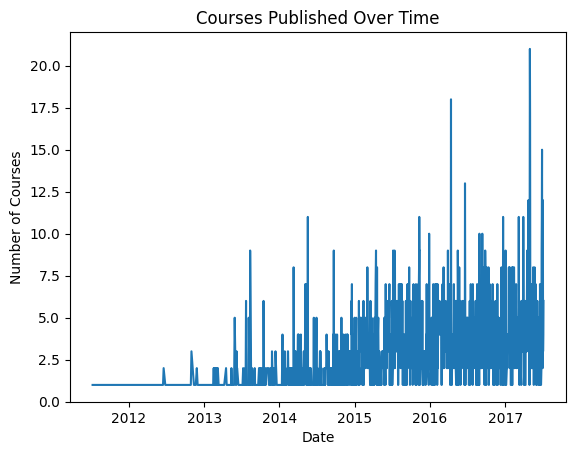

In [34]:
udemy_data['published_date'] = pd.to_datetime(udemy_data['published_timestamp']).dt.date
udemy_data.groupby('published_date').size().plot(kind='line', title='Courses Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Courses')
plt.show()


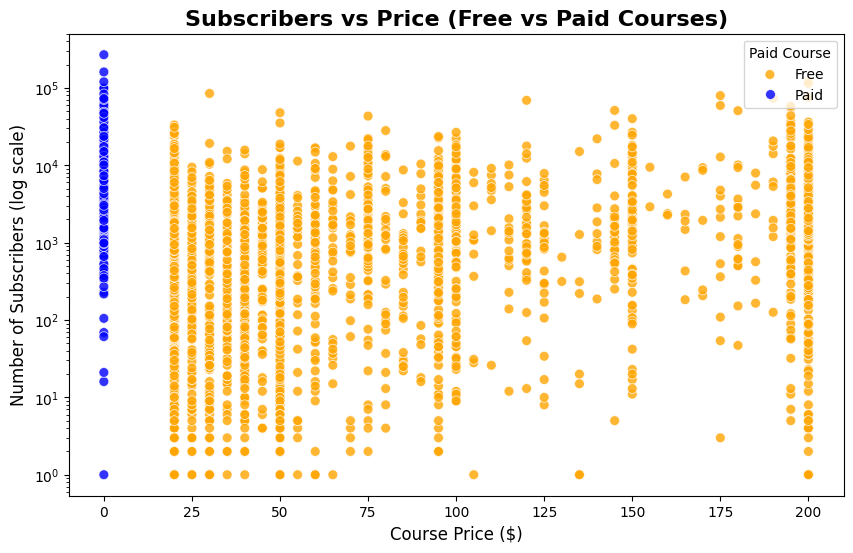

In [35]:
plt.figure(figsize=(10, 6))

palette = {0: 'blue', 1: 'orange'}
sns.scatterplot(
    data=udemy_data,
    x='price',
    y='num_subscribers',
    hue='is_paid',
    palette=palette,
    alpha=0.8,
    s=50  # Marker size
)

plt.yscale('log')

plt.title('Subscribers vs Price (Free vs Paid Courses)', fontsize=16, fontweight='bold')
plt.xlabel('Course Price ($)', fontsize=12)
plt.ylabel('Number of Subscribers (log scale)', fontsize=12)

plt.legend(title='Paid Course', labels=['Free', 'Paid'], loc='upper right')

plt.show()



In [17]:
##### the code below removes non numeric columns, calculates the correlation matrix and creates a correlation heatmap

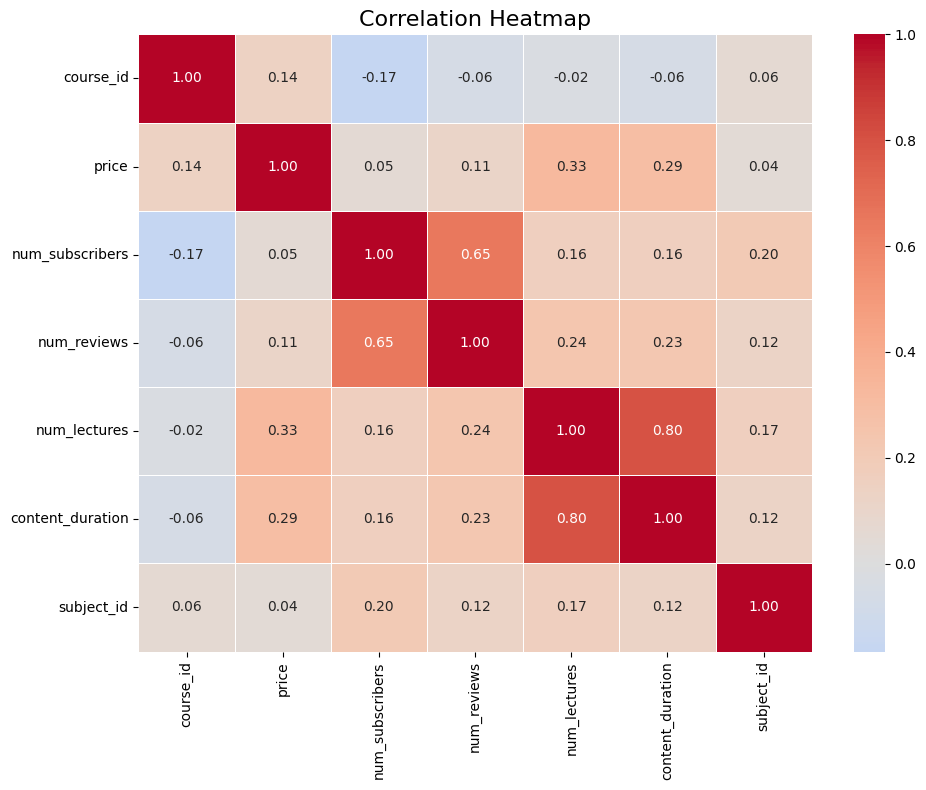

In [36]:
udemy_data_numeric = udemy_data.select_dtypes(include=['int64', 'float64'])  # Selected only numeric columns

correlation_matrix = udemy_data_numeric.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()

plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')
plt.show()



Text(0.5, 1.0, 'number of reviews vs number of subscribers')

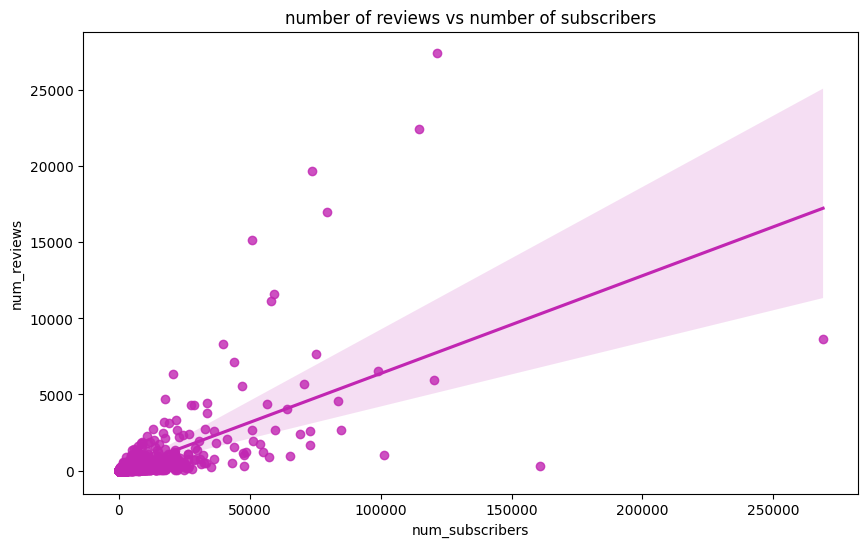

In [37]:
plt.figure(figsize= (10,6))
sns.regplot(data= udemy_data,
           x=  "num_subscribers",
           y= "num_reviews",
           color='#C126B2')
plt.title('number of reviews vs number of subscribers')


positive relationship between number of reviews and number of subscribers

<Axes: title={'center': 'price vs number of subscribers'}, xlabel='price', ylabel='num_subscribers'>

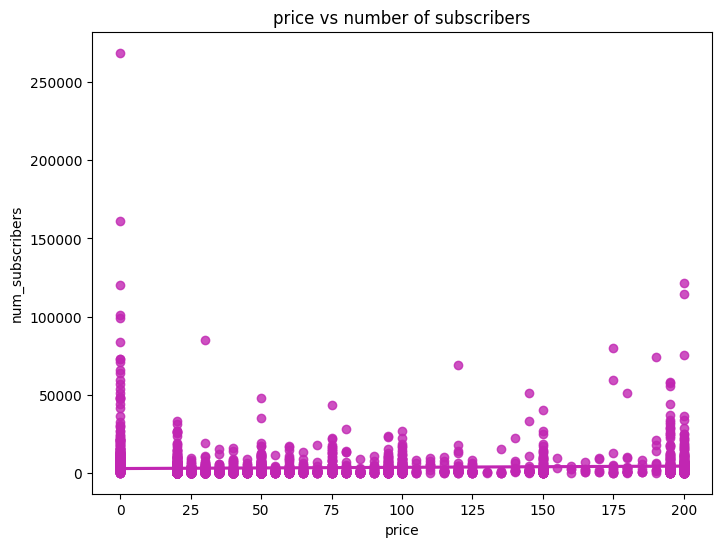

In [38]:
plt.figure(figsize=(8,6))
plt.title('price vs number of subscribers')
sns.regplot(x='price',y='num_subscribers',color='#C126B2',data=udemy_data)

there is no relationship between price and number of subscribers

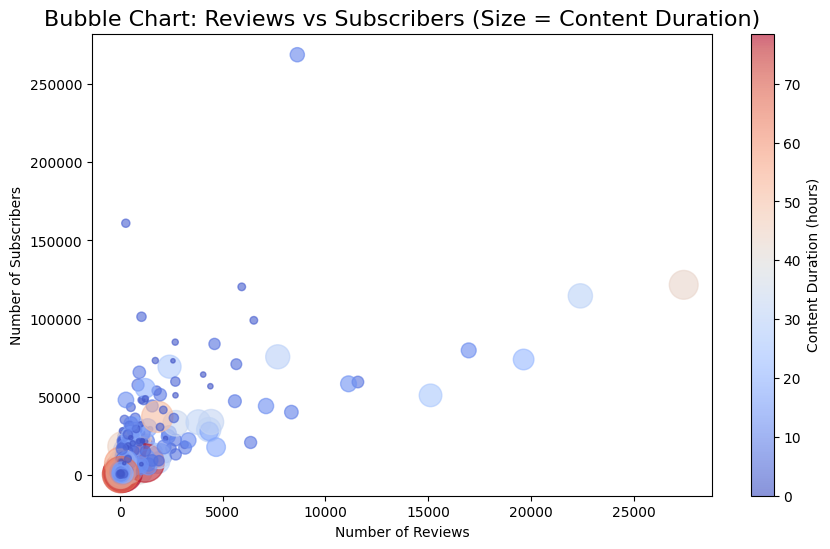

In [21]:
plt.figure(figsize=(10, 6))

bubble = plt.scatter(
    x=udemy_data['num_reviews'], 
    y=udemy_data['num_subscribers'], 
    s=udemy_data['content_duration'] * 10,
    alpha=0.6, 
    c=udemy_data['content_duration'], 
    cmap='coolwarm'
)

cbar = plt.colorbar(bubble)
cbar.set_label('Content Duration (hours)')

plt.title('Bubble Chart: Reviews vs Subscribers (Size = Content Duration)', fontsize=16)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Subscribers')




plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')
plt.show()



#### The above plot shows a positive correlation between the number of reviews and subscribers. This indicates that content with more reviews tends to attract a larger subscriber base.

#### A significant portion of the contents have relatively low numbers of reviews and subscribers.

#### Larger bubbles are sparse and appear in both lower and higher ranges of reviews and subscribers. This indicates that longer content duration does not guarantee higher engagement.

#### Most courses are smaller in size, reflecting shorter content duration as a common trend.

Text(0, 0.5, 'Number of Reviews')

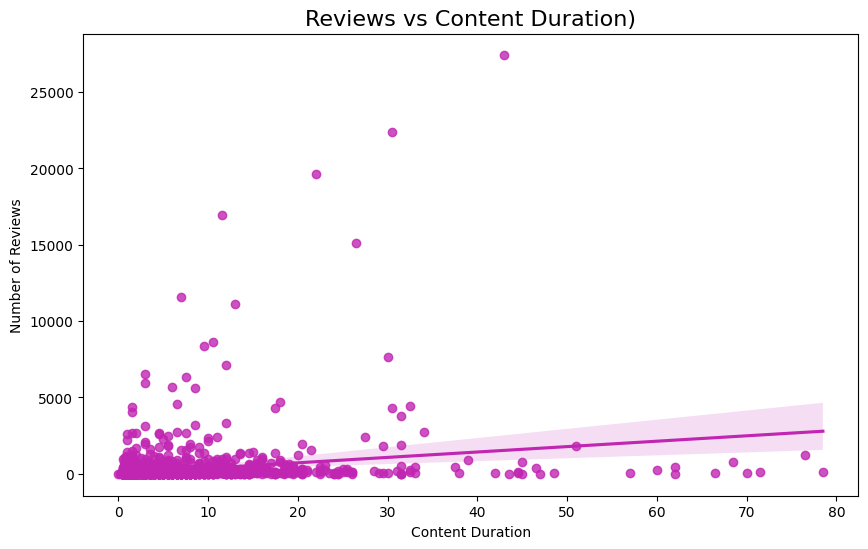

In [39]:
plt.figure(figsize= (10,6))
sns.regplot(data= udemy_data,
           x= "content_duration",
           y= "num_reviews",
           color='#C126B2')
plt.title('Reviews vs Content Duration)', fontsize=16)
plt.xlabel('Content Duration')
plt.ylabel('Number of Reviews')


Text(0, 0.5, 'Number of Subscribers')

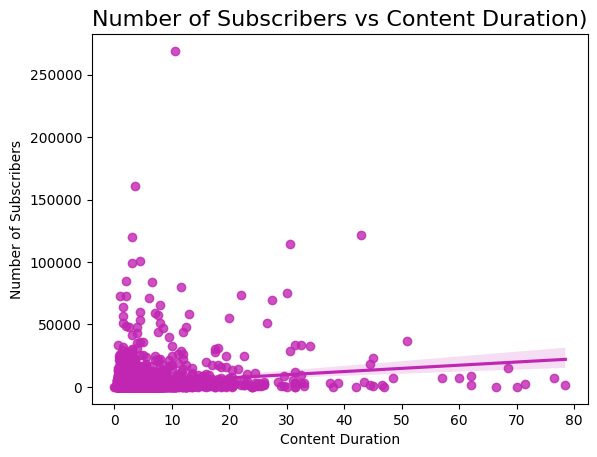

In [40]:
sns.regplot(data= udemy_data,
           x= "content_duration",
           y= "num_subscribers",
           color='#C126B2')
plt.title('Number of Subscribers vs Content Duration)', fontsize=16)
plt.xlabel('Content Duration')
plt.ylabel('Number of Subscribers')


### Conclusion:
Content quality and relevance might be more important than price and duration to attract engagement.